<img src=https://github.com/numpy/numpy/raw/main/branding/logo/primary/numpylogo.svg width=250 alt="NumPy Logo"></img>

# Lessons 18-19: NumPy Basics

This lesson is modified from [NumPy Basics](https://foundations.projectpythia.org/core/numpy/numpy-basics.html) by [Project Pythia](https://projectpythia.org).


[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/aselshall/eds/HEAD)

---

## Overview
NumPy is a  basic package for scientific computing in Python. It offers powerful capabilities for working with n-dimensional arrays, a wide range of mathematical functions, and integration with Fortran, C, and C++ libraries. By the end of this lessons you will be able to: 
- Create NumPy arrays 
- Inspect  NumPy arrays with slicing and indexing
- Preform math calculations with NumPy arrays
- Read and save NumPy arrays

---

## 1. Installing and importing NumPy

### 1.1 Installation

In [1]:
#pip install --upgrade pip

In [2]:
#pip install numpy

After each the installation is complete, make sure to restart the kernel from the menu `Kernel`:`Restart Kernel...`. You need to install these once. Then you can comment the installation command (as they are already commented above) or delete these cells to avoid repeating this ever time your run this notebook.

### 1.2 Imports

Just as we used the nickname `pd` used as an abbreviation for `pandas` in the import statement, we often import `numpy` as `np`. 

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Note</p>
    As a good coding practice, we generally import all the packages that we will need in the first cell in our notebook. However, we are importing NumPy here in the middle of our notebook for educational purpose.</a>
</div>

## 2. Basic concepts and terminologies

### 2.1 NumPy array

Below is a 7x4 2D NumPy array with 28 values, where the first dimension corresponds to rows and the second dimension corresponds to columns. Indexing works similarly to Python, starting from 0. This means that the element at the first row and first column is accessed using index (0, 0), the element at the second row and second column with index (1, 1), and so forth.

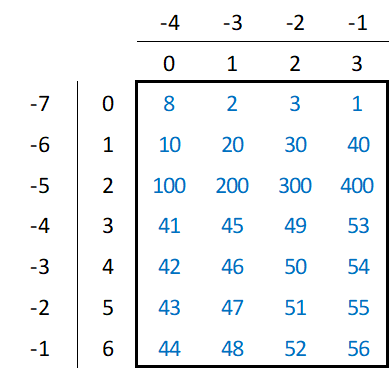

### 2.2 Why array computing?

In core Python, adding sequences of values requires writing a manual loops as we did before. 

Try doing `C = A + B` with core Python

In [1]:
# Add these two lists using core Python 
A = [2, 4, 6, 8, 10]
B = [0, 10, 20, 30, 40]

# C = A+B with a for loop: 
# Define empty list C  
# looping through A and B lists
# add elements in each list
# use `.append()` to update C
C = []
for a, b in zip(A, B):
    c = a + b
    C.append(c)
print(C)

# Add with list comprehension (optional)
C = [a + b for a, b in zip(A, B)]
print(C)

[2, 14, 26, 38, 50]
[2, 14, 26, 38, 50]


This is verbose. Now do this with NumPy

In [2]:
import numpy as np

# Add these two lists using NumPy
A = np.array([2, 4, 6, 8, 10])
B = np.array([0, 10, 20, 30, 40])

# Add with Numpy
C = A + B
print(C)

[ 2 14 26 38 50]


### 2.3 NumPy, MATLAB, R, and Julia

NumPy, like MATLAB and R, enables array-oriented computing. Here are few differences.

Here is the updated table with information filled in for the Julia column:


| Feature                                 | NumPy                                                | MATLAB                                               | R                                                    | Julia                                                |
|-----------------------------------------|------------------------------------------------------|------------------------------------------------------|------------------------------------------------------|------------------------------------------------------|
| Verbosity                               | Can be more verbose                                  | -                                                    | -                                                    | -                                                    |
| Indexing and Memory Order               | 0-based indexing, row-major order                    | 1-based indexing, column-major order                  | 1-based indexing, column-major order                  | 1-based indexing, column-major order                  |
| Variable Assignment                     | Creates a reference, use `.copy()` for a new copy    | Creates a copy by default, arrays are separate copies | Creates a copy by default, arrays are separate copies | Creates a copy by default, arrays are separate copies |
| Data Structures                         | Mainly focuses on arrays and matrices                | Mainly focuses on matrices and cell arrays            | Supports a wide range of data structures like vectors, lists, and data frames | Supports a wide range of data structures like arrays, tuples, dictionaries, and user-defined composite types |
| Function Syntax                         | Uses universal functions (ufuncs) for element-wise operations | Uses element-wise operations with dot notation (e.g., `.*`, `./`) | Vectorized operations with functions like `apply`      | Supports vectorized operations and broadcasting with functions like `broadcast` |
| Broadcasting                            | Supports broadcasting for element-wise operations    | Requires array sizes to match for element-wise operations | Supports broadcasting for element-wise operations      | Supports broadcasting for element-wise operations      |

#### 2.31 NumPy can be more verbose

```matlab
% Create a MATLAB array
arr1 = [1 2 3 4 5];
```
```python
# Create a NumPy array
arr1 = np.array([1, 2, 3, 4, 5])

# Perform element-wise operation (Python or MATLAB)
arr2 = arr1 * 2
```

#### 2.3.2 Indexing and memory order

In MATLAB and R, indexing starts at 1. MATLAB and R follow a column-major order for indexing, where elements in a matrix are stored column by column. For example, accessing the first element of a matrix in MATLAB would be `A(1, 1)`. On the other hand, NumPy follows the Python convention of 0-based indexing. NumPy uses row-major order for indexing, storing elements row by row in memory. So, accessing the first element of a NumPy array would be `arr[0]`.  

MATLAB Indexing:
```matlab
A = [1 2 3; 4 5 6; 7 8 9];
first_element = A(1, 1);
```

NumPy Indexing (Python):
```python
arr = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
first_element = arr[0, 0]
```

#### 2.3.3 Variable assignment

In Numpy, assigning one array to another creates a reference to the same memory location, and thus any modifications to one array affect the other. To create a copy in NumPy similar to Pandas, you must use the `.copy()` method to duplicate the array into a new memory space. On the other hand, in MATLAB and R, assigning one array to another results in automatic duplication, creating separate copies with their own memory locations.

In [3]:
arr1 = np.array([1, 2, 3, 4, 5])
arr2 = arr1  # Creates a reference
arr2[0] = 10  # Modifying arr2 affects arr1 as well
print(arr1)  # Output: [10 2 3 4 5]

arr3 = arr1.copy()  # Create a new copy
arr3[1] = 20  # Modifying arr3 does not affect arr1
print(arr1)  # Output: [10 2 3 4 5]
print(arr3)  # Output: [10 20 3 4 5]

[10  2  3  4  5]
[10  2  3  4  5]
[10 20  3  4  5]


#### 2.3.4 Which tool to use?

MATLAB, R, Julia, and Python are powerful tools for data analysis and scientific computing, each with its own strengths and weaknesses. Here is a comparison:
- MATLAB is ideal for projects that can leverage its specialized engineering toolboxes and where the availability of licenses is not a concern.
- R shines in statistical analysis and is particularly suited for projects with a strong emphasis on statistical rigor and where the richness of R's packages can be fully utilized.
- Julia is known for its high performance and ease of use in numerical computing, making it a great choice for projects that require fast execution and mathematical operations.
- Python with NumPy is an all-around candidate, particularly for projects that may require integration with other aspects of the Python ecosystem.

When choosing a tool for environmental data science, factors such as the specific task at hand, available resources, existing expertise, and integration with other tools should be considered. 

## 3. Generating a NumPy area

There are different ways to generate NumPy arrays. Here are few examples.

### 3.1 Using `np.array()` function

Syntax: `np.array(object, dtype=None, copy=True, order='K', subok=False, ndmin=0)`
- `object`: This is the input data that you want to convert to a NumPy array. It can be a list, tuple, array-like object, etc.
- `dtype`: The data type of the array elements. If not specified, NumPy will determine the data type of the array based on the input data. Common data types include `int`, `float`, `str`, etc.
- `copy`: A boolean parameter that specifies whether to make a copy of the input data (`object`). By default, it is set to `True`, which means a copy is made. If set to `False`, the function will try to avoid a copy and use the input data directly.
- `order`: Specifies the memory layout of the array. It can be `'C'` for C-style (row-major) or `'F'` for Fortran-style (column-major). The default value `'K'` means to keep the order of the input data.
- `subok`: A boolean parameter indicating whether to force the data type of the output array to be a base class of the input data type. The default is `False`.
- `ndmin`: Specifies the minimum number of dimensions that the resulting array should have. If set to a value greater than the number of dimensions in the input data, the output will have additional dimensions.

Example, create this list with two sublists
```python
data = [[2, 4, 6, 8, 10], [0, 10, 20, 30, 40]]
```
and convert the list to NumPy array   ```





In [7]:
# Define a Python list containing two sublists representing rows of data
data = [[2, 4, 6, 8, 10],
        [0, 10, 20, 30, 40]]

# Convert the Python list 'data' to a NumPy array and assign it to the variable 'np_array'
np_array = np.array(data)

# Print array type, shape, and values
print(np_array.dtype, np_array.shape)
print(np_array)

int32 (2, 5)
[[ 2  4  6  8 10]
 [ 0 10 20 30 40]]


<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Length of rows must be the same
</div>

### 3.2 Using `np.arange()` to create an array with a range of values (*optional*)

Syntax: `np.arange([start, ]stop, [step, ]dtype=None)`
- `[start, ]`: Optional start value. Default is 0.
- `stop`: End value exclusive.
- `[step, ]`: Optional step size. Default is 1.
- `dtype=None`: Optional data type specification of output 

Let us generate 
```
[2, 4, 6, 8, 10]
```
using np.arange.

In [8]:
#Generate data with `np.arange` as `np_arange` and print it.
np_arange = np.arange(2,12)

# Print array type, shape, and values
print(np_arange.dtype, np_arange.shape)
print(np_arange)

int32 (10,)
[ 2  3  4  5  6  7  8  9 10 11]


What is we want to generate the data below?
```
[[2, 4, 6, 8, 10], 
 [0, 10, 20, 30, 40]]
```
To do this we can create a list, generate data using `np.arange` for each row as a sublist, and convert list to numpy array with `np.array`.

In [9]:
# Generate data using np.arange for each row and combine with np.array in a list
np_arange = np.array([np.arange(2, 12, 2), np.arange(0, 50, 10)])

# Print array type, shape, and values
print(np_arange.dtype, np_arange.shape)
print(np_arange)

int32 (2, 5)
[[ 2  4  6  8 10]
 [ 0 10 20 30 40]]


### 3.3 Using `np.linspace()` to create an array with evenly spaced values (*optional*)
Syntax: `np.linspace(start, stop, num=50, endpoint=True, retstep=False, dtype=None)`
- `start`: The starting value of the sequence.
- `stop`: The end value of the sequence.
- `num`: The number of samples to generate. Default is 50.
- `endpoint`: If `True`, `stop` is the last sample. Default is `True`.
- `retstep`: If `True`, return `(array, step)`, where `step` is the spacing between samples.
- `dtype`: The data type of the output array.

Let us create an array 'linspace_array' using np.linspace with start=2, stop=10, and containing 17 equally spaced elements

In [10]:
# Generate 'linspace_array' with np.linspace: start=2, stop=10, 16 elements
linspace_array = np.linspace(2,10,17)

# Print array type, shape, and values
print(linspace_array.dtype, linspace_array.shape)
print(linspace_array)

float64 (17,)
[ 2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5  7.   7.5  8.   8.5
  9.   9.5 10. ]


You can even display the spacing between samples with the parameter `retstep=True`

In [11]:
# Generate 'linspace_array' with np.linspace: start=2, stop=10, 16 elements with `retstep=True`
linspace_array = np.linspace(2,10,17,retstep=True)

# Print array type, shape, and values
print(linspace_array[0].dtype, linspace_array[0].shape)
print(linspace_array)

float64 (17,)
(array([ 2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,  5.5,  6. ,  6.5,  7. ,
        7.5,  8. ,  8.5,  9. ,  9.5, 10. ]), 0.5)


### 3.4 Using `np.ones()` or `np.zeros()` to create ones or zeros array (*optional*)

Syntax: `np.ones(shape, dtype=None, order='C')`  
Syntax: `np.zeros(shape, dtype=None, order='C')`
  
Try creating 3x5 array with values of zeros, ones, and eights

In [12]:
# Generate and print 3x5 np_zeros array
np_zeros = np.zeros([3,5])

print(np_zeros.dtype, np_zeros.shape)
print(np_zeros,'\n')

# Generate and print 3x5 np_ones array
np_ones = np.ones([3,5])

print(np_ones.dtype, np_ones.shape)
print(np_ones,'\n')

# Generate and print 3x5 np_eights array
np_eights = np.ones([3,5]) * 8

print(np_eights.dtype, np_eights.shape)
print(np_eights)

float64 (3, 5)
[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]] 

float64 (3, 5)
[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]] 

float64 (3, 5)
[[8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]
 [8. 8. 8. 8. 8.]]


### 3.5 Using `np.full()` with any specified value and type

The `np.full` function in NumPy is used to create a new array of a specified shape and fill it with a specified value.
Syntax: `np.full(shape, fill_value, dtype=None, order='C')`
- `shape`: The shape of the new array. This can be a single integer to specify a 1-D array or a tuple of integers to specify multi-dimensional arrays.
- `fill_value`: The value to fill the new array with.
- `dtype`: The data type of the output array. If not specified, the data type is inferred from the `fill_value`.
- `order`: Specifies the memory layout of the array. By default, it is 'C', which specifies row-major order.

For example, let us create 3x5 NumPy array filled with NaN values.

In [13]:
# Generate and print 3x5 np_nans array
np_nans = np.full((3, 5), np.nan)

print(np_nans.dtype, np_nans.shape)
print(np_nans)

float64 (3, 5)
[[nan nan nan nan nan]
 [nan nan nan nan nan]
 [nan nan nan nan nan]]


In this example, we will create two NumPy arrays:
- An array named `colors` of size 5, initialized using `np.full()` with all elements set to 'black'.
- An array named `values` of size 5, created using `np.array()` with some arbitrary values.

The task is to update the `colors` array such that if the values at corresponding positions in the `values` array are 10 or higher, the value in the `colors` array will be changed to 'Red'.

In [14]:
# Create the array (5,) with arbitrary values
values= np.array([10, 14, 9, 4, 17])

# Create the colors array (5,) with all elements set to 'black'
colors = np.full(5, 'Black')

# Update colors to 'Red' where values >= 5
colors[values >= 10 ]= 'Red'

# Display array, type, shape and values
print(colors.dtype, colors.shape)
print(colors)

<U5 (5,)
['Red' 'Red' 'Black' 'Black' 'Red']


## 4. Read csv file with mixed data types as NumPy array

We want to read the AQI data from 'aqi_data_Miami.csv' into a NumPy array. To read a CSV file into one NumPy array with mixed data types (datetime and floats) is tricky. Using `np.loadtxt` directly will not work due to datetime and numeric data. Instead, we can use `np.genfromtxt` of NumPy or `pd.read_csv` of Pandas.

### 4.1 Using `genformtxt` (*Optional*)

To read a CSV file into one NumPy array with mixed data types (datetime and floats), you can use the `genfromtxt` function with appropriate data types specified for each column, or read it as an object and convert to float or datetime as needed.

Here's an example:
- We load the CSV file as an array of objects (strings)
- We replace empty strings with np.nan before converting to datetime or float 
- We convert string to datetime or float 

By handling empty strings and converting the data to datetime or floats, this approach should help you avoid the conversion error when using different NumPy functions and methods. Here we are only replacing empty strings with np.nan; how to handle NaN when performing calculations is a different issue that is discussed later.

In [15]:
# Read the CSV file into a NumPy string array with dtype object
# Column names: [datetime-empty], 'PM2.5', 'PM10',  'NO2', 'SO2',  'CO', 'O3'
data_genfromtxt = np.genfromtxt('data/aqi_data_Miami.csv', delimiter=',', dtype=object, skip_header=1)
print("data_str:", data_genfromtxt.dtype, data_genfromtxt.shape)
print(data_genfromtxt[0],'\n')

# Extracting first column as datetime (you can do it in one line)
dates =data_genfromtxt[:, 0]  # String
dates = np.where(dates == b'', np.nan, dates) # Replace empty strings with a placeholder value (np.nan)
dates = np.asarray(dates, dtype=np.datetime64) # Convert string to dateime
print("dates:", dates.dtype, dates.shape)
print(dates[0],'\n')

# Extract numerical values as numbers (you can do it in one line)
values = data_genfromtxt[:, 1:] # String
values = np.where(values == b'', np.nan, values) # Replace empty strings with a placeholder value (np.nan)
values = np.asarray(values, dtype=np.float64) # Convert string to float
print("values:", values.dtype, values.shape)
print(values[0],)

data_str: object (1096, 7)
[b'2019-01-01' b'30.477083' b'18.0' b'8.416667' b'0.6625' b'0.477667'
 b'0.035412'] 

dates: datetime64[D] (1096,)
2019-01-01 

values: float64 (1096, 6)
[30.477083 18.        8.416667  0.6625    0.477667  0.035412]


<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    <p>When you see <code>dtype=object</code> in a NumPy array, it implies that the elements in that array are not of a homogeneous data type like integers, floats, or strings. Instead, each element can be of any Python object type, which can make operations on the array less efficient compared to arrays with a fixed data type.</p>
</div>

### 4.2 Using `pd.read_csv`

To read the data into NumPy array as follows:
- Read the data from 'aqi_data_Miami.csv'with Pandas as DataFrame
- Convert DataFrame into a NumPy array using `.to_numpy()`
- Convert first column into datetime format using `pd.to_datetime()`

Let us try to do it.

In [16]:
# Read the CSV file into a NumPy mixed type array with dtype object
# Column names: [datetime-empty], 'PM2.5', 'PM10',  'NO2', 'SO2',  'CO', 'O3'
data_read_csv = pd.read_csv('data/aqi_data_Miami.csv').to_numpy()

# Convert the first column in the NumPy array to datetime format
data_read_csv[:, 0] = pd.to_datetime(data_read_csv[:, 0])
print("data:", data_read_csv.dtype, data_read_csv.shape)
print(data_read_csv[0],'\n')

# Extracting first column as datetime (you can do it in one line)
dates =data_read_csv[:, 0]  # object
dates = np.asarray(dates, dtype=np.datetime64) # Convert object to dateime
print("dates:", dates.dtype, dates.shape)
print(dates[0],'\n')

# Extract numerical values as numbers (you can do it in one line)
values = data_read_csv[:, 1:] # object
values = np.asarray(values, dtype=np.float64) # Convert object to float
print("values:", values.dtype, values.shape)
print(values[0])

data: object (1096, 7)
[Timestamp('2019-01-01 00:00:00') 30.477083 18.0 8.416667 0.6625 0.477667
 0.035412] 

dates: datetime64[us] (1096,)
2019-01-01T00:00:00.000000 

values: float64 (1096, 6)
[30.477083 18.        8.416667  0.6625    0.477667  0.035412]


The `data_genfromtxt` array is mainly a string array unsuitable for calculations, while `data_read_csv` can be used for calculations but may cause data type errors with certain NumPy operations, functions, or methods.

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
The purpose of <code>np.asarray</code> is to ensure that the input is returned as a NumPy array, irrespective of whether the input is already a NumPy array or another array-like object. You can use the keyword argument <code>dtype</code> to set data type.
</div>

## 5. Perform calculations with NumPy

#### 5.1 Formula

NumPy is used for basic arithmetic operations such as addition (`+`), subtraction (`-`), division (`/`), multiplication (`*`), exponentiation (`**`).

For example compute element-wise:  
$c= 4a^2 - b + 5$

In [17]:
# Add these two lists using NumPy
a = np.array([2, 4, 6, 8, 10])
b = np.array([0, 10, 20, 30, 40])

# Add with Numpy
C = 4*a**2 + b + 5
print(C)

[ 21  79 169 291 445]


<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    These arrays must be the same shape!
</div>

#### 5.2 Functions

In addition to basic arithmetic operations, NumPy has common mathematical and trigonometric functions, descriptive statistics and statistical functions, rounding functions, and commonly used math functions.

**Arithmetic Operations**

| Calculation        | Op | NumPy Function     | Output                |
|--------------------|----|--------------------|------------------------|
| Addition           | +  | `np.add(2, 3)`     | `5`                    |
| Subtraction        | -  | `np.subtract(5, 2)`| `3`                    |
| Division           | /  | `np.divide(6, 2)`  | `3.0`                  |
| Multiplication     | *  | `np.multiply(2, 4)`| `8`                    |
| Exponentiation     | ** | `np.power(2, 3)`   | `8`                    |

**Absolute and Sign Functions**

| Calculation        | NumPy Function | Output                |
|--------------------|----------------|------------------------|
| Absolute value     | `np.abs(-5)`   | `5`                    |
| Sign function      | `np.sign(-3)`  | `-1`                   |

**Square Root and Exponential Functions**

| Calculation        | NumPy Function | Output                |
|--------------------|----------------|------------------------|
| Square root        | `np.sqrt(25)`  | `5.0`                  |
| Cube root          | `np.cbrt(8)`   | `2.0`                  |
| Exponential        | `np.exp(2)`    | `7.3890561`            |
| 2^x                | `np.exp2(3)`   | `8.0`                  |

**Logarithmic Functions**

| Calculation        | NumPy Function         | Output                |
|--------------------|------------------------|------------------------|
| Natural logarithm  | `np.log(10)`           | `2.3025851`            |
| Logarithm (base 10)| `np.log10(100)`        | `2.0`                  |
| Logarithm (base 2) | `np.log2(8)`           | `3.0`                  |
| Logarithm (base x) | `np.log(8)/np.log(2)`  | `3.0`                  |
| Logarithm of (1+x) | `np.log1p(0.5)`        | `0.4054651`            |

**Trigonometric Functions**

| Calculation        | NumPy Function     | Output                |
|--------------------|--------------------|------------------------|
| Sine               | `np.sin(np.pi/2)`  | `1.0`                  |
| Cosine             | `np.cos(0)`        | `1.0`                  |
| Tangent            | `np.tan(np.pi/4)`  | `1.0`                  |
| Inverse Sine       | `np.arcsin(1)`     | `1.5707963`            |
| Inverse Cosine     | `np.arccos(0)`     | `1.5707963`            |
| Inverse Tangent    | `np.arctan(1)`     | `0.7853982`            |
| Hyperbolic Sine    | `np.sinh(0.5)`     | `0.5210953`            |
| Inverse Hyperbolic | `np.arcsinh(0.5)`  | `0.48121183`           |
| Convert to Radians | `np.radians(90)`   | `1.5707963`            |
| Convert to Degrees | `np.degrees(np.pi)`| `180.0`                |

**Statistical Functions**

| Calculation              | NumPy Function      | Output        |
|--------------------------|---------------------|----------------|
| Mean (average)           | `np.mean([1, 2, 3])`| `2.0`          |
| Mean with NaN values     | `np.nanmean([1, 2, np.nan, 3])` | `2.0` |
| Standard deviation       | `np.std([1, 2, 3])` | `0.81649658`   |
| Standard deviation with NaN values | `np.nanstd([1, 2, np.nan, 3])` | `0.816496580927726` |
| Variance                 | `np.var([1, 2, 3])` | `0.66666667`   |
| Variance with NaN values | `np.nanvar([1, 2, np.nan, 3])` | `0.6666666666666666` |
| Maximum value            | `np.max([1, 2, 3])` | `3`            |
| Maximum value with NaN values | `np.nanmax([1, 2, np.nan, 3])` | `3.0` |
| Minimum value            | `np.min([1, 2, 3])` | `1`            |
| Minimum value with NaN values | `np.nanmin([1, 2, np.nan, 3])` | `1.0` |
| Pearson correlation coefficient | `np.corrcoef([1, 2, 3], [3, 2, 1])` | `array([[ 1., -1.], [-1.,  1.]])` |

**Rounding Functions**

| Calculation                                      | NumPy Function       | Output          |
|--------------------------------------------------|----------------------|------------------|
| Round to nearest even value                      | `np.round(3.6)`      | `4.0`            |
| Round towards zero                               | `np.trunc(-2.8)`     | `-2.0`           |
| Round up towards positive infinity               | `np.ceil(5.4)`       | `6.0`            |
| Round down towards negative infinity             | `np.floor(4.9)`      | `4.0`            |

**Random Number Generation**

| Calculation                                      | NumPy Function       | Output             |
|--------------------------------------------------|----------------------|---------------------|
| Generate random numbers from [0, 1)              | `np.random.rand(5)`   | `[0.97625072, 0.8556528, 0.18848637, 0.83233422, 0.80931194]` |
| Generate random integers                         | `np.random.randint(1, 10, 3)`| `[7, 3, 5]`     |
| Generate random numbers from a normal distribution| `np.random.randn(2, 2)`  | `[[-0.06505159,  0.29853219], [-0.78611954,  0.2610972 ]]` |
| Generate random numbers from a uniform distribution| `np.random.uniform(0, 1, 3)`| `[0.5488135 , 0.71518937, 0.60276338]` |
| Generate random samples from a given 1-D array   | `np.random.choice([1, 2, 3, 4, 5], 3)` | `[4, 1, 2]`      |

**Differentiation and Integration**

| Calculation                              | NumPy/SciPy Function          | Output |
|------------------------------------------|-------------------------------|---------|
| Trapezoidal rule integration             | `np.trapz([1, 2, 3])`         | `4.0`   |
| Cumulative trapezoidal integration       | `np.cumtrapz([1, 2, 3])`      | `[1.5, 3.0, 4.5]` |
| Adaptive quadrature integration          | `scipy.integrate.quad(func, 0, 1)` | `0.78539816, 2.77555756e-14` |
| Simpson's rule integration               | `scipy.integrate.simps([1, 2, 3])` | `4.0` |
| Gradient-based numerical differentiation | `np.gradient([1, 2, 3])`     | `[1. 1. 1.]` |
| Discrete numerical differentiation       | `np.diff([1, 4, 9, 16])`     | `[3, 5, 7]` |

**Matrix Operations**

| Calculation                              | NumPy Function          | Output |
|------------------------------------------|-------------------------|---------|
| Permute the dimensions of an array.             | `np.transpose([[1, 2], [3, 4]])` | `array([[1, 3], [2, 4]])`   |
| Compute the dot product of two arrays.          | `np.dot([1, 2], [3, 4])` | `11`                        |
| Perform matrix multiplication.                   | `np.matmul([[1, 2], [3, 4]], [[5, 6], [7, 8]])` | `array([[19, 22], [43, 50]])` |
| Compute the matrix transpose.                    | `np.transpose([[1, 2], [3, 4]])` | `array([[1, 3], [2, 4]])`    |
| Compute the matrix inverse.                      | `np.linalg.inv([[1, 2], [3, 4]])` | `array([[-2. ,  1. ], [ 1.5, -0.5]])` |
| Concatenate arrays along a specified axis.      | `np.concatenate(([1, 2], [3, 4]))` | `array([1, 2, 3, 4])`       |

**NumPy Constants**

| NumPy Constants | Constant                                                  | Output  |
|-----------------|-----------------------------------------------------------|----------|
| `np.pi`         | The mathematical constant π (pi)                         | `3.14159265` |
| `np.e`          | The mathematical constant e (Euler's number)             | `2.71828183` |
| `np.inf`        | Positive infinity                                        | `inf`    |
| `np.nan`        | Not a Number (NaN)                                       | `nan`    |
| `np.NINF`       | Negative infinity                                        | `-inf`   |
| `np.finfo(np.float64).eps` | Machine epsilon for float64                     | `2.220446049250313e-16` |
| `np.finfo(np.float64).max` | Maximum representable number in float64           | `1.7976931348623157e+308` |
| `np.finfo(np.float64).min` | Minimum positive normal number in float64         | `2.2250738585072014e-308` |

The above tables showcase some of the calcuations that you can perform with NumPy.

<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    Check out NumPy's list of mathematical functions <a href=https://numpy.org/doc/stable/reference/routines.math.html>here</a>!
</div>

**Test your understanding**

Complete the code below

In [18]:
# Generate Two NumPy arrays
A = np.array([2, 4, 6, 8, 10])
B = np.array([0, 10, 20, 30, 40])  #Anlge in degrees

# B/A
B/A

array([0.        , 2.5       , 3.33333333, 3.75      , 4.        ])

In [19]:
#sqrt(A)
np.sqrt(A)

array([1.41421356, 2.        , 2.44948974, 2.82842712, 3.16227766])

In [20]:
#log(A)
np.log10(A)

array([0.30103   , 0.60205999, 0.77815125, 0.90308999, 1.        ])

In [21]:
# sin(B)
# Use `np.sin?` to check if angle in degrees or radians
np.sin(np.radians(B))

array([0.        , 0.17364818, 0.34202014, 0.5       , 0.64278761])

In [22]:
#Try np.sin? or help(np.sin)

### 5.3 NumPy methods

In addition to the general functions above,  NumPy arrays have a variety methods to perform operations on the arrays. For example given array `a=[3,1,2,2]`

| Description                                      | Method              | Output                      |
|--------------------------------------------------|---------------------|-----------------------------|
| Calculate the sum of array elements.             | `a.sum()` | `8`                         |
| Compute the arithmetic mean along the specified axis. | `a.mean()` | `2.0`                       |
| Find the minimum value in an array.             | `a.min()` | `1`                         |
| Find the maximum value in an array.             | `a.max()` | `3`                         |
| Find the index of the minimum value in an array. | `a.argmin()` | `1`                         |
| Find the index of the maximum value in an array. | `a.argmax()` | `0`                         |
| Return a sorted copy of an array.               | `a.sort()` | `array([1, 2, 2, 3])`          |
| Reshape the array into a new shape.             | `a.reshape((4, 1))` | `array([[3], [1], [2], [2]])`    |
| Find the unique elements of an array.           | `a.unique()` | `array([1, 2, 3])`          |

In [23]:
# Generate Two NumPy arrays
A = np.array([[2, 4, 6, 8, 10],[0, 10, 20, 30, 40]])  

# Use a .max method to find max of array A
A.max()

40

In [24]:
#Reshape A from 2x5 array to 5x2 array
A.reshape([5,2])

array([[ 2,  4],
       [ 6,  8],
       [10,  0],
       [10, 20],
       [30, 40]])

### 5.4 Perform operation along a specific dimesion

Many functions like `np.sum(axis=)`, `np.mean(axis=)`, `np.max(axis=)`, etc., are commonly used for performing operations along a specific dimension in NumPy arrays. For example: 
- `np.sum(arr, axis=0)` calculates the sum along axis 0, summing elements vertically.
- `np.mean(arr, axis=1)` calculates the mean along axis 1, computing the mean horizontally.
- `np.max(arr, axis=0)` finds the maximum value along axis 0.

and so on.

In [25]:
# Generate a 2d NumPy array
A = np.array([[2, 4, 6, 8, 10], 
              [0, 10, 20, 30, 40]])

# Calculate the mean of each column in array A (across rows)
print("Mean of each column:")
mean_of_each_column = np.mean(A, axis=0)
print(mean_of_each_column)

# Calculate the mean of each row in array A (across columns)
print("\nMean of each row:")
mean_of_each_row = np.mean(A, axis=1)
print(mean_of_each_row)

# Find the maximum value in each row of array A
print("\nMaximum value in each row:")
max_value_in_each_row = np.max(A, axis=1)
print(max_value_in_each_row)

Mean of each column:
[ 1.  7. 13. 19. 25.]

Mean of each row:
[ 6. 20.]

Maximum value in each row:
[10 40]


### 5.5 Apply a function to a NumPy Array (*optional*)
To apply a function to a NumPy array, you can use NumPy's `vectorize` function. Here is the general syntax:
```python
# Apply the function element-wise to the array
result_arr = func(arr)
```
Here's an example of applying a function to convert temperatures from Fahrenheit to Celsius using a NumPy array:

In [26]:
# Define the function to convert Fahrenheit to Celsius
def fahrenheit_to_celsius(f):
    return (f - 32) * 5/9

# Create a NumPy array of temperatures in Fahrenheit
temps_fahrenheit = np.array([32, 68, 86, 104])

# Apply the conversion function element-wise to the array
temps_celsius = fahrenheit_to_celsius(temps_fahrenheit)

print(temps_celsius)

[ 0. 20. 30. 40.]


### 5.6 Example (*advanced*)

Let us calculate temperature advection using the formula: 
$$
\text{advection} = -\vec{v} \cdot \nabla T
$$
where
- $\vec{v}$ is the velocity vector
- $\nabla T$ represents the temperature gradient

The dot product of the velocity vector and the temperature gradient gives the temperature advection. If you're not familiar with the advection dispersion equation, do not worry, and you can just look at how we apply some NumPy functions. 
   
We'll start with some random $T$ and $\vec{v}$ values

In [27]:
# Generate random temperature (T) and velocity components (u, v)
temp = np.random.randn(100, 50)  # Random temperature values in a 100x50 array
u = np.random.randn(100, 50)     # Random u component of velocity in a 100x50 array
v = np.random.randn(100, 50)     # Random v component of velocity in a 100x50 array

We can calculate the `np.gradient` of our new $T(100x50)$ field as two separate component gradients,

In [28]:
gradient_x, gradient_y = np.gradient(temp)

In order to calculate $-\vec{v} \cdot \nabla T$, we will use `np.dstack` to turn our two separate component gradient fields into one multidimensional field containing $x$ and $y$ gradients at each of our $100x50$ points,

In [29]:
grad_vectors = np.dstack([gradient_x, gradient_y])
print(grad_vectors.shape)

(100, 50, 2)


and then do the same for our separate $u$ and $v$ wind components,

In [30]:
wind_vectors = np.dstack([u, v])
print(wind_vectors.shape)

(100, 50, 2)


Finally, we can calculate the dot product of these two multidimensional fields of wind and temperature gradient components as an element-wise multiplication, `*`, and then a `sum` of our separate components at each point (i.e., along the last `axis`),

In [31]:
advection = (wind_vectors * -grad_vectors).sum(axis=-1)
print(advection.shape)

(100, 50)


## 6. Indexing and subsetting arrays

### 6.1 Indexing
 
We can use integer indexing to reach into our arrays and pull out individual elements. Let's make a toy 2-d array to explore. Here we create a 12-value `arange` and `reshape` it into a 3x4 array.

In [32]:
a = np.arange(12).reshape(3, 4)
a

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

NumPy uses row-major order for indexing, storing elements row by row in memory. So, accessing the first row of a NumPy array would be `a[0]`. 

In [33]:
a[0]

array([0, 1, 2, 3])

Similarly, to pull out the last _row_ we can index in reverse with negative indices,

In [34]:
a[-1]

array([ 8,  9, 10, 11])

We can do this for multiple dimensions. For example, `a[1,2]` will pull out the 2nd row and the 3rd column in array `a`.

In [35]:
a[1, 2]

6

We can again use these negative indices to index backwards,

In [36]:
a[-1, -1]

11

and even mix-and-match along dimensions,

In [37]:
a[1, -2]

6

### 6.2 Slicing

Slicing syntax is written as `array[start:stop[:step]]`, where **all numbers are optional**.
- defaults: 
  - start = 0
  - stop = len(dim)
  - step = 1
- The second colon is **also optional** if no step is used.

Let's pull out just the first row, `m=0` of `a` and see how this works!

In [38]:
# 2x6 2d array a
a =np.array([[10, 20, 30, 40, 50, 60],
             [100, 200, 300, 400, 500, 600]])

a[0]

array([10, 20, 30, 40, 50, 60])

In Python, the colon `:` is commonly used in slicing operations for sequences like DataFrames, NumPy arrays, lists, tuples, and strings. For example, in NumPy, the colon `:` allows for slicing of NumPy arrays along different elements and dimensions.

For example, for a 1D array `a`:
- `a[:]` would select all elements of array `a`.
- `a[1:4]` would select elements from index 1 to index 4 (exclusive).
- `a[2:]` would select elements starting from index 2 to the end of the array.
- `a[:3]` would select elements from the beginning up to index 3 (exclusive).

For a 2D array `a`:
- `a[:, :]` would select all elements of array `a`.
- `a[1:4, :]` would select rows from index 1 to index 4 (exclusive) and all columns.
- `a[2:, :]` would select rows starting from index 2 to the end and all columns.
- `a[:3, :]` would select rows from the beginning up to index 3 (exclusive) and all columns.

Let us try few examples

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Slice notation is <b>exclusive</b> of the final index.
</div>

In [39]:
# 2x6 2d array a
a =np.array([[10, 20, 30, 40, 50, 60],
             [100, 200, 300, 400, 500, 600]])

a[:,2]

array([ 30, 300])

In [40]:
# 2x6 2d array a
a =np.array([[10, 20, 30, 40, 50, 60],
             [100, 200, 300, 400, 500, 600]])

a[1,1:]

array([200, 300, 400, 500, 600])

In [41]:
# 2x6 2d array a
a =np.array([[10, 20, 30, 40, 50, 60],
             [100, 200, 300, 400, 500, 600]])

a[:,2:4]

array([[ 30,  40],
       [300, 400]])

In [42]:
# 2x6 2d array a
a =np.array([[10, 20, 30, 40, 50, 60],
             [100, 200, 300, 400, 500, 600]])

a[0,1:4:2]

array([20, 40])

### 6.3 Indexing arrays with boolean values

#### 6.3.1 Array comparisons
NumPy can easily create arrays of Boolean values and use those to select certain values to extract from an array

We want to create two datasets:
- `pre_data` for  one year before lockdown
- `post_data` for data one year after lockdown

By doing a comparison between a NumPy array and a value, we get an array of values representing the results of the comparison between each element and the value.

In [43]:
# Define date ranges
lockdown_start = pd.Timestamp('2020-04-01')
one_year_before = pd.Timestamp('2019-04-01')
one_year_after = pd.Timestamp('2021-04-01')

#Original data
print("Original data:", data_read_csv.shape)
print(data_read_csv[0],'\n')

# Filter the NumPy array based on the date range for pre-covid19 data
mask = (data_read_csv[:, 0] >= one_year_before) & (data_read_csv[:, 0] < lockdown_start)
pre_data = data_read_csv[mask]
print("Pre data:", pre_data.shape)
print(pre_data[0],'\n')

# Filter the NumPy array based on the date range for post-covid19 data
mask = (data_read_csv[:, 0] >= lockdown_start) & (data_read_csv[:, 0] < one_year_after)
post_data = data_read_csv[mask]
print("Post data:", post_data.shape)
print(post_data[0])

Original data: (1096, 7)
[Timestamp('2019-01-01 00:00:00') 30.477083 18.0 8.416667 0.6625 0.477667
 0.035412] 

Pre data: (366, 7)
[Timestamp('2019-04-01 00:00:00') 7.745198999999999 18.0 20.675 0.971429
 0.475 0.036176] 

Post data: (365, 7)
[Timestamp('2020-04-01 00:00:00') 10.8875 24.0 8.979167 0.828571 0.259952
 0.045353]


<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
    Indexing arrays with arrays requires them to be the same size!
</div>

We can plot pre and post data using `plt.plot(x,y)`.

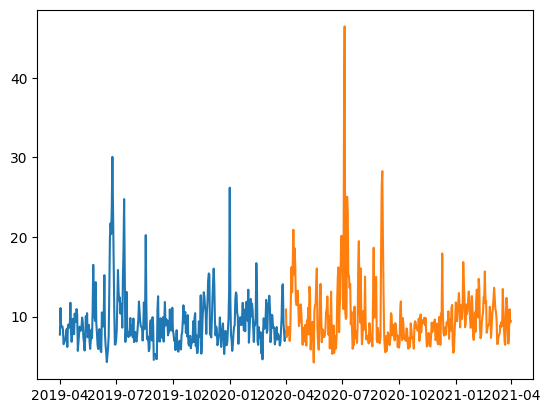

In [44]:
plt.plot(pre_data[:,0],pre_data[:,1]);
plt.plot(post_data[:,0],post_data[:,1]);

#### 6.3.2 Replacing values with indexing
We can use this conditional indexing to _assign_ new values to certain positions within our array, somewhat like a masking operation.

For example, replace negative numbers with 0.

In [45]:
#Wind speed array where -ve value is measurement error 
wind_speed = np.array([1, -0.1, 8, np.nan, 10])

wind_speed[wind_speed<1]=0

wind_speed

array([ 1.,  0.,  8., nan, 10.])

Another bitwise operator we can find helpful is Python's `~` complement operator, which can give us the **inverse** of our specific mask to every value _not_ satisfied 

For example, with some cleverness we can remove both nan and negative numbers with the `~`

In [46]:
#Wind speed array where -ve value is measurement error 
wind_speed = np.array([1, -0.1, 8, np.nan, 10])

wind_speed[~(wind_speed>=0)]=0

wind_speed

array([ 1.,  0.,  8.,  0., 10.])

#### 6.3.3 Cleaning data: Replacing NaN with `np.nan_to_num`

Replacing NaN with zero or the mean value can be done using `np.nan_to_num`.

For example, replace the NaN value the with mean of the dataset:

In [47]:
# Make a copy so we don't modify the original data
wind_speed = np.array([1, -0.1, 8, np.nan, 10])

# Replace all places with NaN to the mean value of data
wind_speed_clean = np.nan_to_num(wind_speed, nan=np.nanmean(wind_speed))

#Display wind speed without NaN
wind_speed_clean

array([ 1.   , -0.1  ,  8.   ,  4.725, 10.   ])

In the example above, `np.nanmean` is used instead of `np.mean` to handle datasets with NaN values, as the mean of a dataset containing NaN values is NaN.

<div class="admonition alert alert-warning">
    <p class="admonition-title" style="font-weight:bold">Warning</p>
Replacing NaN values should be done carefully and transparently to maintain analysis integrity. These replacements have the potential to change data distribution, skew results, and introduce statistical biases, possibly leading to information loss if NaN values were meaningful. Before substituting NaN values, it's advisable to explore alternative strategies such as imputation, elimination of NaN-containing rows/columns, or utilizing advanced methods that suit the data and analysis requirements.
</div>

#### 6.3.4 Cleaning data: Remove rows with NaN

Another approach for dealing with NaN is to remove rows with NaNs. You can use the `np.isnan` function to find elements with NaN values along rows and columns with the logical function `any`.

Here is an example:

In [48]:
# A 2D array with NaN values
values = np.array([[1, 2, 3],
                 [4, np.nan, 6],
                 [7, 8, 9]])

# Find rows with NaN values
nan_rows = np.any(np.isnan(values), axis=1) 


# Remove rows with NaN values
values_cleaned = values[~nan_rows]

values_cleaned

array([[1., 2., 3.],
       [7., 8., 9.]])

The code `np.any(np.isnan(values), axis=1)` identifies rows in a 2D array with NaN values:
- `np.isnan(values)` creates a boolean mask for NaN in `values`
- `np.any(..., axis=1)` checks each row for NaN, such that if any value in the row is NaN (i.e. True) it turns True, otherwise it returns False
- `nan_rows` shows rows with NaN in `values`
- Once we know the rows with NaN, we can keep the rows without NaN using the not `~` operator.

This operation helps handle missing data in datasets to avoid calculation errors. After cleaning, 8 rows were removed.


#### 6.3.5 Cleaning data: Remove rows with NaN for mixed data array

Many of the NumPy functions such `isnan` is not directly supported on arrays that contain a mix of datetimes and floats such as the `data` array below. To address this issue, we can create a mask for NaN values for one data type (e.g., float columns) and use this mask to remove NaN rows from `data`, `dates`, and `values`.

In [49]:
#Read csv file to NumPy array
data = pd.read_csv('data/aqi_data_Miami.csv').to_numpy() #Read csv file as np array
data[:, 0] = pd.to_datetime(data[:, 0]) # Convert 1st column to datetime
dates = np.asarray(data[:, 0], dtype=np.datetime64) # Extract dates
values = np.asarray(data[:, 1:], dtype=np.float64) # Extract number 
print("Original data shape: data", data.shape, 
      "dates", dates.shape,"values", values.shape)

#Remove NaNs
nan_rows = np.any(np.isnan(values), axis=1) # Find rows with NaN values in float columns
data = data[~nan_rows] # Remove rows with NaN values
dates = dates[~nan_rows] # Remove rows with NaN values
values = values[~nan_rows] # Remove rows with NaN values
print("Cleaned data shape: data", data.shape, 
      "dates", dates.shape,"values", values.shape)

Original data shape: data (1096, 7) dates (1096,) values (1096, 6)
Cleaned data shape: data (1088, 7) dates (1088,) values (1088, 6)


#### 6.3.6 Indexing using arrays of indices (*optional*)

You can also use a list or array of indices to extract particular values--this is a natural extension of the regular indexing. For instance, just as we can select the first element:

In [50]:
# 2x6 2d array a
temp =np.array([101, 98, 88, 97, 96, 98])

We can also extract the first, third, and last elements 

In [51]:
temp[[0,2,-1]]

array([101,  88,  98])

One of the ways this comes into play is trying to sort NumPy arrays using `argsort`. This function returns the indices of the array that give the items in sorted order. So for our `temp`,

In [52]:
inds = temp.argsort()
inds

array([2, 4, 3, 1, 5, 0], dtype=int64)

i.e., our lowest value is at index `2`, next `4`, and so on. We can use this array of indices as an index for `temp`,

In [53]:
temp[inds]

array([ 88,  96,  97,  98,  98, 101])

to get a sorted array back!

With some clever slicing, we can pull out the last 3, or 103highest, values of `temp`,

In [54]:
three_highest = inds[-3:]
print(temp[three_highest])

[ 98  98 101]


There are other NumPy `arg` methods that return indices for operating; check out the [NumPy docs](https://numpy.org/doc/stable/reference/routines.sort.html) on sorting your arrays!

## 7. Loop through an NumPy array

### 7.1 Loop through elements

To loop through elements of a 2D NumPy array, you can use nested loops similar to looping in nested lists. This enables iterating over each row in the 2D array and then iterating through each element within that row.

Here is an example:

In [55]:
a=np.array([[10, 20],[40, 50], [70, 80]])

for row_values in a:
    for element_value in row_values:
        print(element_value)
        

10
20
40
50
70
80


### 7.2 Loop with index

You can loop with an index in case you want to use the index. 
  
This is a MATLAB style:

In [56]:
a=np.array([[10, 20],[40, 50], [70, 80]])

for row_index in range(a.shape[0]):
    for col_index in range(a.shape[1]):
        print(row_index,col_index)
        print(a[row_index,col_index])

0 0
10
0 1
20
1 0
40
1 1
50
2 0
70
2 1
80


This is the MATLAB code in case you are wondering:
```MATLAB
% This is MATLAB, not Python 
a = [10 20; 40 50; 70 80];

for row_index = 1:size(a, 1)
    for col_index = 1:size(a, 2)
        disp([row_index, col_index])
        disp(a(row_index, col_index))
    end
end
```
This is not very different from NumPy!

This is a Python style Using the `enumerate` that provides both the index and the value of elements in a sequence during iteration.

In [57]:
# Creating a simple NumPy array
Values = np.array([10, 20, 30, 40, 50])

# Using enumerate to loop over the array elements with their index
for index, Value in enumerate(Values):
    print("Index:", index, "Value:", Value)

Index: 0 Value: 10
Index: 1 Value: 20
Index: 2 Value: 30
Index: 3 Value: 40
Index: 4 Value: 50


Here is another example with two 2d NumPy arrays.  The outer loop iterates over rows of two NumPy arrays `array_a` and `array_b`, while the inner loop iterates over corresponding elements in each row.

In [58]:
a_array = np.array([[10, 20], [40, 50], [70, 80]])
b_array = np.array([[100, 200], [400, 500], [700, 800]])

for row_index, (a_row_values, b_row_values) in enumerate(zip(a_array, b_array)):
    for col_index, (a_value, b_value) in enumerate(zip(a_row_values, b_row_values)):
        print("Row Index:", row_index)
        print("Column Index:", col_index)
        print("Sum of elements:", a_value + b_value)

Row Index: 0
Column Index: 0
Sum of elements: 110
Row Index: 0
Column Index: 1
Sum of elements: 220
Row Index: 1
Column Index: 0
Sum of elements: 440
Row Index: 1
Column Index: 1
Sum of elements: 550
Row Index: 2
Column Index: 0
Sum of elements: 770
Row Index: 2
Column Index: 1
Sum of elements: 880


### 7.3 Loop with index using `np.ndindex`

When you have a multidimensional array and you want to iterate over all the indices of the array, `np.ndindex` comes in handy. It generates an iterator that produces tuples of indices that can be used to access elements of the array in a nested loop structure.

In [59]:
# Create a 2D array 
arr = np.array([[10, 20, 0],
                 [40, 50, 60]])

# Iterate over all indices of the array using np.ndindex
for idx in np.ndindex(arr.shape):
    print(f"Index: {idx}, Value: {arr[idx]}")

Index: (0, 0), Value: 10
Index: (0, 1), Value: 20
Index: (0, 2), Value: 0
Index: (1, 0), Value: 40
Index: (1, 1), Value: 50
Index: (1, 2), Value: 60


<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
The Python built-in function <code>enumerate</code> returns an iterator yielding pairs of index and value for each element in an iterable, allowing for easy access to both the index and the value during iteration.
</div>

## 8. Broadcasting (*advanced*)

Broadcasting in NumPy is a powerful mechanism that allows arrays of different shapes to be operated together. The smaller array is "broadcast" across the larger array so that they have compatible shapes for element-wise operations.

For example, when you add a 1D array to a 2D array, NumPy will automatically broadcast the 1D array to the shape of the 2D array to perform the addition element-wise.

In [60]:
a = np.array([1, 2, 3])  # 1D array shape (3,)
b = np.array([[4, 5, 6], [7, 8, 9]])  # 2D array shape (2, 3)

# Perform broadcasting
a + b

array([[ 5,  7,  9],
       [ 8, 10, 12]])

To broadcast arrays `a` and `b` in NumPy, arrays should have compatible shapes for broadcasting. If `a` has shape (3,) and `b` has shape (4,), then we need to reshape `a` to be a column vector (2D array). Then NumPy will automatically broadcast the 1D array `b` to the shape of the 2D array `a` to perform the addition element-wise similar to the previous example.

In [61]:
a = np.array([1, 2, 3])   #  1D array shape (3,)
b = np.array([4, 5, 6, 7]) # 1D array shape (4,)

# Reshape 'a' from row vector (1D shape) to column vector (2D shape)
a = a[:, np.newaxis]  # 2d array shape (3, 1)

# Perform broadcasting
a + b

array([[ 5,  6,  7,  8],
       [ 6,  7,  8,  9],
       [ 7,  8,  9, 10]])

## 9. Write NumPy arrays to a file

Writing a NumPy array to a: 
- csv file using `np.savetxt()` offers easy readability and compatibility with various programs
- npy file with `np.save()` offers faster read and write times and the ability to preserve array-specific properties like shape and dtype

### 9.1 Write NumPy arrays to csv files

To write a NumPy array to a CSV file, you can use `np.savetxt()` function. For example, using 

```python
np.savetxt('output.csv', data, delimiter=',')
```

is a convenient way to save NumPy arrays to csv files with specified delimiters.

### 9.2 Write NumPy arrays to npy files

To write a NumPy array to a NPY file, you can use `np.save()` function. For example, using 

```python
np.save('output.npy', data, allow_pickle=True)
```
is an efficient way to save NumPy array to npy file, preserving array data in a binary format.


When dealing with arrays containing mixed data types like floats and datetimes, you can simplify the saving process by using `np.save` with `allow_pickle=True`. This parameter allows you to save and load the array without converting it to a structured array.

Here is an example,

In [62]:
# Display data before saving
print("data:", data.dtype, data.shape)
print(data[0],'\n')
print("dates:", dates.dtype, dates.shape)
print(dates[0],'\n')
print("values:", values.dtype, values.shape)
print(values[0])

# Save the data arrays to a file 
np.save('data/data.npy', data, allow_pickle=True) #Mixed data types (datetime and float)
np.save('data/dates.npy', dates) #Data type datetime 
np.save('data/values.npy', values) #Data type float

data: object (1088, 7)
[Timestamp('2019-01-01 00:00:00') 30.477083 18.0 8.416667 0.6625 0.477667
 0.035412] 

dates: datetime64[us] (1088,)
2019-01-01T00:00:00.000000 

values: float64 (1088, 6)
[30.477083 18.        8.416667  0.6625    0.477667  0.035412]


To load the array saved with `allow_pickle=True`, you can use `np.load` with the same parameter set to `True`.

In [63]:
# Load the array from the saved file with allow_pickle=True
data = np.load('data/data.npy', allow_pickle=True) #Mixed data types (datetime and float)
dates = np.load('data/dates.npy') #Data type datetime 
values = np.load('data/values.npy') #Data type float

# Display data after loading
print("data:", data.dtype, data.shape)
print(data[0],'\n')
print("dates:", dates.dtype, dates.shape)
print(dates[0],'\n')
print("values:", values.dtype, values.shape)
print(values[0])

data: object (1088, 7)
[Timestamp('2019-01-01 00:00:00') 30.477083 18.0 8.416667 0.6625 0.477667
 0.035412] 

dates: datetime64[us] (1088,)
2019-01-01T00:00:00.000000 

values: float64 (1088, 6)
[30.477083 18.        8.416667  0.6625    0.477667  0.035412]


<div class="admonition alert alert-info">
    <p class="admonition-title" style="font-weight:bold">Info</p>
    <code>np.load()</code> in NumPy has an <code>allow_pickle</code> parameter that determines whether pickled objects can be loaded. Pickled objects are like packages created by Python's pickle tool for easy storage or sharing. The default setting is <code>False</code> for security reasons. You can set it to <code>True</code> if you trust the source and need to load arrays with Python objects like Timestamps.
</div>

Let us confirm the successful loading of the array with mixed data types. We can plot the time against PM2.5, which are the first and second columns, respectively. 

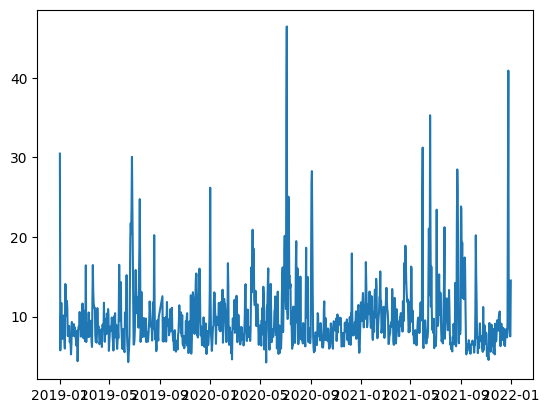

In [64]:
plt.plot(data[:,0],data[:,1]);

### 9.3 Write NumPy arrays to npz file

You can save multiple arrays in one `.npz` file.

In [65]:
# Display data before saving
print("data:", data.dtype, data.shape)
print(data[0],'\n')
print("dates:", dates.dtype, dates.shape)
print(dates[0],'\n')
print("values:", values.dtype, values.shape)
print(values[0])

# Save the data arrays to a file 
np.savez('data/data.npz', data, dates, values, allow_pickle=True) #Mixed data types (datetime and float)

data: object (1088, 7)
[Timestamp('2019-01-01 00:00:00') 30.477083 18.0 8.416667 0.6625 0.477667
 0.035412] 

dates: datetime64[us] (1088,)
2019-01-01T00:00:00.000000 

values: float64 (1088, 6)
[30.477083 18.        8.416667  0.6625    0.477667  0.035412]


We can load the data from the `.npz` file and access arrays with array keys  `arr_0`, `arr_1`, and so on. 

In [66]:
# Load the data from the file
loaded_data = np.load('data/data.npz', allow_pickle=True)

# Access the arrays saved in the file
data = loaded_data['arr_0']
dates = loaded_data['arr_1']
values = loaded_data['arr_2']

# Display data after loading
print("data:", data.dtype, data.shape)
print(data[0],'\n')
print("dates:", dates.dtype, dates.shape)
print(dates[0],'\n')
print("values:", values.dtype, values.shape)
print(values[0])

data: object (1088, 7)
[Timestamp('2019-01-01 00:00:00') 30.477083 18.0 8.416667 0.6625 0.477667
 0.035412] 

dates: datetime64[us] (1088,)
2019-01-01T00:00:00.000000 

values: float64 (1088, 6)
[30.477083 18.        8.416667  0.6625    0.477667  0.035412]


## 10. Summary
In this notebook we introduced NumPy with some useful technique such as:
- generating NumPy array with numeric and non-numeric values
- reading a csv file with mixed data types as NumPy array
- preforming calcuations with formula and functions
- specifying math (e.g., mean or sum) along `axis`
- subset data according to conditions
- Handling missing values NaN
- save and load a NumPy array with mixed data types

Next, let us explore an exercise and application.

---

## Resources and references
- [NumPy Users Guide](https://numpy.org/devdocs/user/quickstart.html#less-basic) expands further on some of these topics, as well as suggests various [Tutorials](https://numpy.org/learn/), lectures, and more.
- [SciPy Lecture Notes](https://scipy-lectures.org)
- [Basic 1-page cheat sheet by Data Camp](https://images.datacamp.com/image/upload/v1676302459/Marketing/Blog/Numpy_Cheat_Sheet.pdf)
- [Top 10 NumPy Cheat sheets](https://www.kaggle.com/discussions/getting-started/255139)